In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier

from dojo.nn import NeuralNetwork
from dojo.nn.layers import Dense

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3)

assert len(X) == len(y)

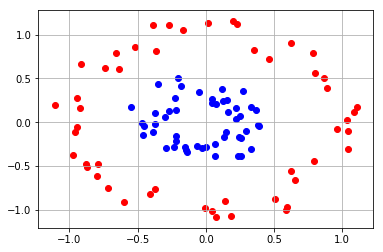

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

plt.grid()
plt.show();

## Build the Neural Network

In [71]:
M, N_INPUTS = X.shape
model = NeuralNetwork(alpha=0.01, n_iterations=100_000, verbose=False)

model.add(Dense(100, N_INPUTS, activation="sigmoid"))
model.add(Dense(1, 100, activation="sigmoid"))

In [72]:
model.fit(X.T, y)

NeuralNetwork(
    alpha=0.01,
    n_iterations=100000,
    loss=<dojo.nn.losses.CrossEntropy object at 0x10fe303c8>,
    verbose=False,
    last_loss_value=0.6929380577865817,
)

In [73]:
model.evaluate(X.T, y)

0.51

In [74]:
def plot_decision_boundry(model, X, y, transpose=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show();

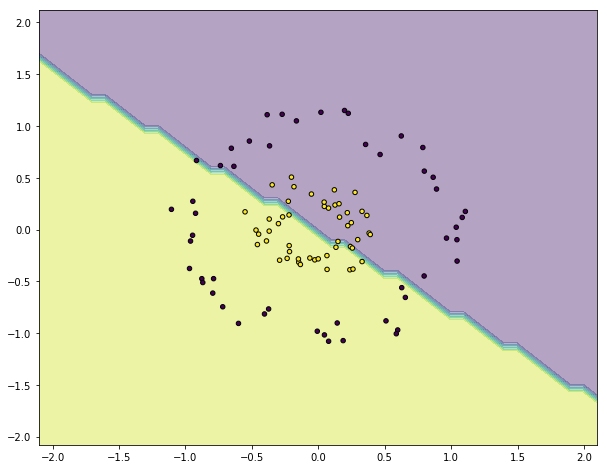

In [75]:
plot_decision_boundry(model, X, y)